In [5]:
import numpy as np
import matplotlib.pyplot as plt

- - -

    1. Considera la secuencia de tiempo discreto:

                                                    x(n) = cos (nπ/8)
                
    Entonces las frecuencias de dos señales de tiempo continuo que producen ésta misma secuencia, cuando son muestreadas a frecuencia Fs, son:

    (a) Fs y 17/16 Fs
    (b) 1/16 Fs y 8/16 Fs
    (c) 1/16 Fs y 81/16 Fs

    ¿Por qué?

##### (nπ/8) = (2nπ/16) = (2nπ(Fo/Fs)/16) 

##### (Fo/Fs) = 1/16 ---> Fo = Fs/16

##### Fk = Fo + k.Fs
##### Fk = Fs*(1/16+k)

##### si k = 0 ---> Fk = Fs/16

##### si k = 1 ---> Fk = Fs (1/16 + 1) = Fs.17/16

##### si k = 2 ---> Fk = Fs (1/16 + 2) = Fs.33/16

##### si k = 3 ---> Fk = Fs (1/16 + 3) = Fs.49/16

##### si k = 4 ---> Fk = Fs (1/16 + 4) = Fs.65/16

##### si k = 5 ---> Fk = Fs (1/16 + 5) = Fs.81/16

#### Por lo tanto, la respuesta correcta es C.

- - -

    2. La información contenida en el archivo “patron.txt” representa un patrón que se trata de buscar dentro de otra señal, almacenada en el archivo “señal.txt”. Sabiendo que tanto el patrón como la señal fueron muestreados a 100 Hz, determina la ubicación del patrón dentro de la señal.

In [14]:
señal = np.loadtxt('señal.txt')
patron = np.loadtxt('patron.txt')

señal.shape , patron.shape

((4000,), (4000,))

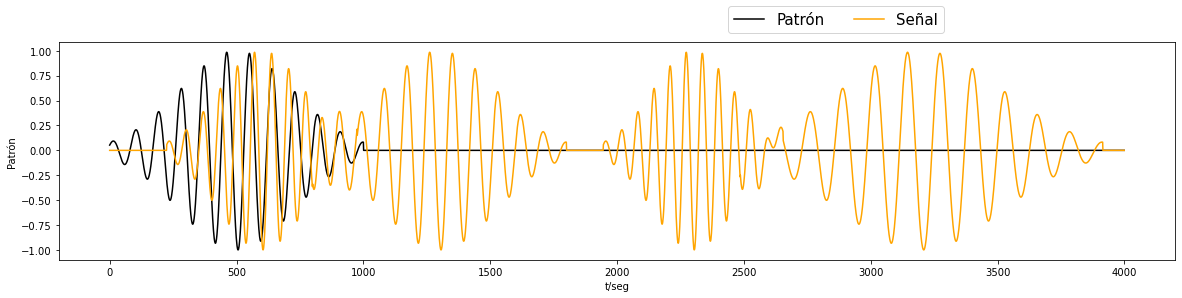

In [15]:
N = 4000
Fs2 = 100

n2 = np.arange (len(señal))
t = n2/Fs2

plt.figure(figsize=(20,4))
plt.plot(n2,patron,'black')
plt.plot (n2,señal,"orange")
plt.xlabel('t/seg')
plt.ylabel('Patrón')
plt.legend(('Patrón','Señal'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.show()

In [16]:
import import_ipynb
from FCorrelación_parcial import lcorr

importing Jupyter notebook from FCorrelación_parcial.ipynb


In [17]:
R = lcorr (patron,señal)

np.where (R[:,1] == np.max (R[:,1])) #Encontrar el máximo de amplitud
#Cuánto hay que desplazar para que se superpongan las señales.

(array([800]),)

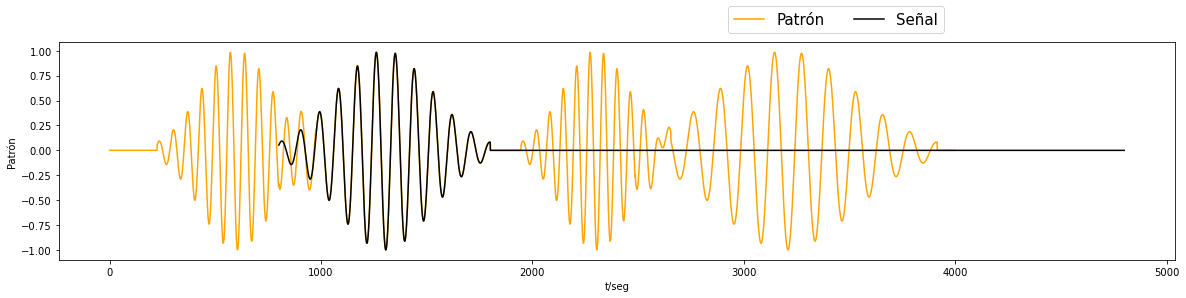

In [19]:
plt.figure(figsize=(20,4))
plt.plot (n2,señal,"orange")
plt.plot(n2+800,patron,'black')
plt.xlabel('t/seg')
plt.ylabel('Patrón')
plt.legend(('Patrón','Señal'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.show()

- - -

    3. Los datos de la señal “signal.txt” corresponde a ciclos completos de una señal formada por la suma de 2 o más componentes sinusoidales y muestreada a 400 Hz. Grafica la señal en función del tiempo y de la frecuencia y a partir de la información que pueda observar indica:

    (a) ¿Cuántas componentes conforman la señal? 
    (b) ¿En qué frecuencia se observa cada componente? 
    (c) ¿Qué amplitud tiene cada componente? 
    (d) Analiza si podrías determinar si las componentes son senoidales o cosenoidales.

### Apartado A

In [6]:
import bioread

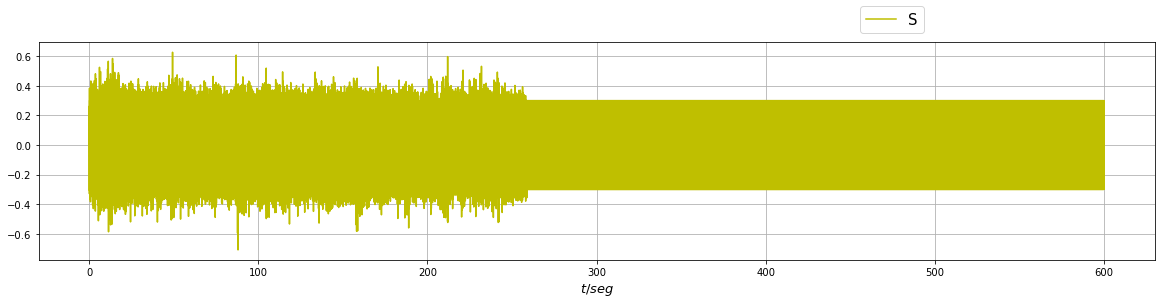

In [10]:
signal = np.loadtxt('signal.txt')

Fs = 400

n = np.arange (len(signal))
t = n/Fs

plt.figure(figsize=(20,4))
plt.plot(t,signal,color='y')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Signal'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

In [11]:
from scipy.fftpack import fft, fftfreq

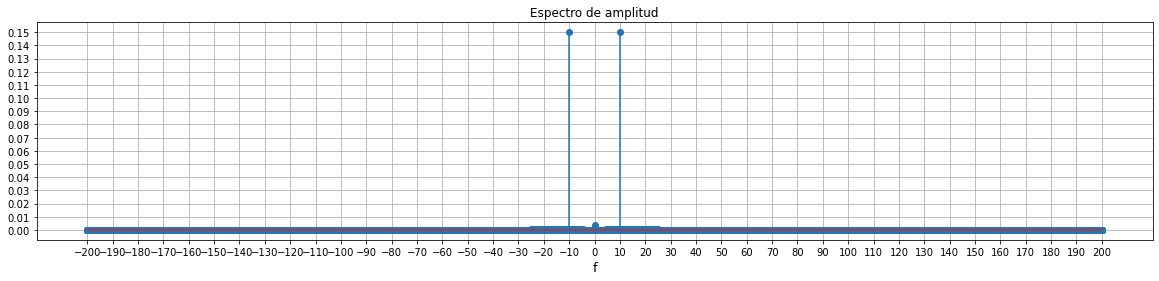

In [28]:
H = fft (signal) / len (signal) #normalizamos
f = fftfreq (len(signal),1/Fs)

plt.figure(figsize=(20,4))
plt.stem(f,abs(H))
plt.xlabel('f', fontsize=13)
plt.title('Espectro de amplitud')
plt.xticks(np.arange(-200,210,10))
plt.yticks(np.arange(0,0.16,0.01))
plt.grid(True)
plt.show()

##### Se puede observar en el gráfico del espectro que está conformada por 2 señales. Da un solo armónico.

### Apartado B

In [39]:
print (f"El valor donde se encuentran las frecuencias de cada competente es: {np.where(abs(H) == np.max(abs(H)))}")

El valor donde se encuentran las frecuencias de cada competente es: (array([  6000, 234000]),)


In [42]:
print (f"El primer armónico se encuentra en f = {f[6000]} Hz.")
print (f"El segundo armónico se encuentra en f = {f[234000]} Hz.")

El primer armónico se encuentra en f = 10.0 Hz.
El segundo armónico se encuentra en f = -10.0 Hz.


##### En el gráfico se verifica que la la frecuencia correspondiente a f = 10 Hz y su opuesto f = -10 Hz.

### Apartado C

In [30]:
print (f"El máximo valor de amplitud del espectro es: {np.max (abs(H))}")

El máximo valor de amplitud del espectro es: 0.14999953186464887


### Apartado D

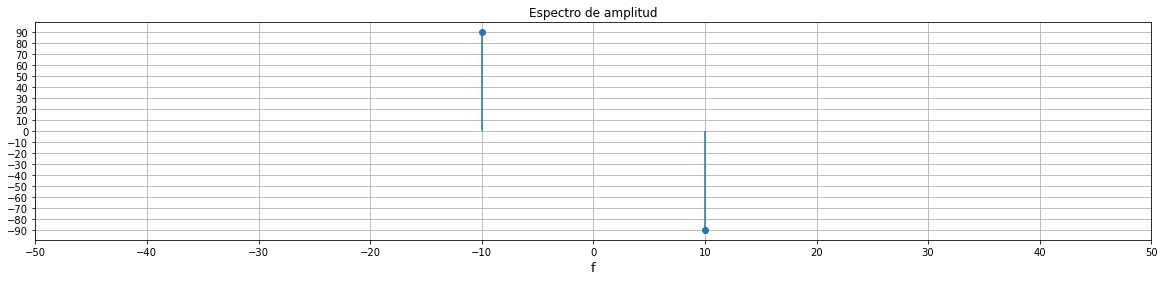

In [153]:
plt.figure(figsize=(20,4))
plt.stem(f[234000],np.angle(H[234000])*180/np.pi)
plt.stem(f[6000],np.angle(H[6000])*180/np.pi)
plt.xlabel('f', fontsize=13)
plt.title('Espectro de amplitud')
plt.xticks(np.arange(-50,60,10))
plt.yticks(np.arange(-90,100,10))
plt.grid(True)
plt.show()

#### Vemos entonces que la sumatoria estará formada sólo por dos términos: 𝑘 = 1 y 𝑘 = −1. Para 𝑘 = 1 la fase es 𝜃; mientras que para 𝑘 = −1, la fase es (−𝜃).

- - -

    4. Considera el proceso estocástico dado por: 

                                                x = cos (2π * (F/Fs) * n + θ)

    donde F = 10Hz, Fs = 100 Hz y Θ es ruido aleatorio con distribución uniforme en [0, 1).

    (a) Construye no menos de 10 funciones de densidad de probabilidad (pdf) a partir de 50 observaciones independientes para cada longitud de segmento de entre 1 y 10 segundos. 

    (b) Grafica las pdf promedio de cada longitud de segmento. 

    (c) Calcula y grafica la media (mu) y el desvío estándar (sigma), ambas versus la longitud de segmento.

    En el ítem (c) recuerda la integración numérica por el método del trapecio:

                                        [a,b] ∫ f(x)dx = [i=0,n-1] ∑ [f(i+1)+f(i)][x[i+1]-x(i)] / 2

In [43]:
from random import gauss

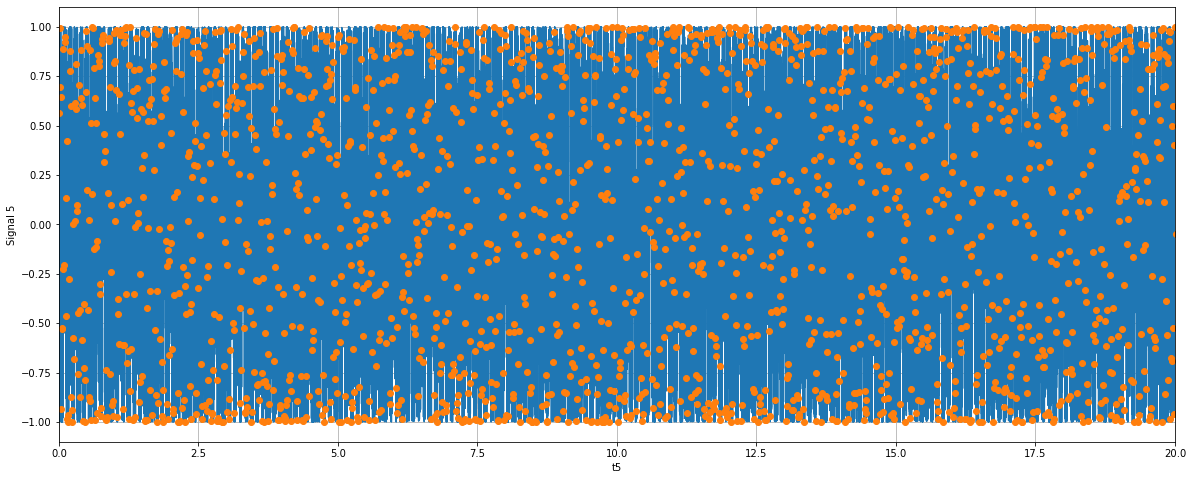

In [221]:
F = 10
Fs = 100
me = 0
dest = 1
t = np.arange(0,600,0.001)
n = np.arange(0,60000)
N=len(t)
Nn = len(n)
ruidot = np.random.normal(me,dest, N)
ruidon = np.random.normal(me,dest, Nn)
xn4 = np.cos(2*np.pi*(F/Fs)*n+ ruidon)
xt4 = np.cos(2*np.pi*F*t + ruidot)


plt.figure (figsize =(20,8))
plt.plot(t,xt4)
plt.plot(n/Fs,xn4,'o')
plt.xlim(0,20)
plt.xlabel ("t5")
plt.ylabel ("Signal 5")
plt.grid (True)
plt.show ()

In [222]:
n = np.arange(1*Fs,11*Fs,Fs)
seg = np.round(n) #vector de longitudes de segmento
nseg = len(seg)
seg, nseg

(array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]), 10)

In [223]:
len (xt4)/10*Fs

6000000.0

In [212]:
from FEstimaciondeunafdp_new1 import pdf_new1

In [224]:
bigp = np.empty(0) #Matriz vacía en la que vamos a agregar los datos con lo que vamos a construir los pdf.
#Por cada longitud de segmento tenemos una matriz y cada una de ellas, vamos a elegir 10 filas.

bigY = np.empty(0,dtype=float)

dat = xt4

Ndat = len(dat)

x0, xf, Np = -1.5, 1.5, 24000
d = (xf-x0)/Np #Vector de paso.
x = x0 + d*np.arange(Np)


for i in np.arange(nseg): #Este lazo recorre las diferentes longitudes de segmento.
    datos = np.empty((int(seg[i]),0)) #Genero una matriz donde guardaré los datos.
    m = Ndat//seg[i] #Cuántas columnas tendrá para cada caso, division: // = N° entero
    aux = np.reshape(dat[0:seg[i]*m],(int(seg[i]),int(m)),order= 'F')
    datos = np.append(datos, aux, axis=1) #Datos para cada longitud de segmento.
    #Ya inserte los datos para cada longitud de segmento, que se van agregando en forma de columnas.
    #Debo construir las fdp con la misma cantidad de datos.
    #Eleccion aleatoria. Hemos dicho q ibamos a tomar el peor de los casos: 764 columnas .
    mi = np.random.choice(int(m),600,replace=False) #Elige aleatoriamente 818 numeros con las columnas que se va a quedar. Esto ya que dividimos en 100 segmentos.
    #Replace=false para que no se repitan los datos.
    datos = datos[:,mi] #Nos quedamos con todas las filas y las columnas mi.
    #Hemos creado de nuevo la matriz pero más pequeña y todas las pdf se construiran con la misma cantidad de datos.
    r = np.random.choice(seg[i],50,replace=False) #Elijo las 10 filas aleatoriamente.
    p = datos[r,:]
    bigp = np.append(bigp, p)
    
    y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1) #1: nombre de la matriz, 2: lo que le agrego.
    y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1) #1:los datos[fila,columnas],desde donde,hasta donde, cantidad de datos, valor que ajusta el ancho de banda.
    y5 = pdf_new1(p[4,:],x0,xf,Np,1); y6 = pdf_new1(p[5,:],x0,xf,Np,1)
    y7 = pdf_new1(p[6,:],x0,xf,Np,1); y8 = pdf_new1(p[7,:],x0,xf,Np,1)
    y9 = pdf_new1(p[8,:],x0,xf,Np,1); y10 = pdf_new1(p[9,:],x0,xf,Np,1)

    #MATRIZ P DESDE DONDE SE CONSTRUYEN LAS FUNCIONES 
    #MATRIZ Y QUE JUNTA LAS FUNCIONES CONSTRUIDAS

    Y = np.hstack((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10)) #Acumulo horizontalmente
    bigY = np.append(bigY, Y)

In [225]:
y1.shape, Y.shape, np.shape(bigY), Np * 10 * nseg,nseg

((24000,), (240000,), (2400000,), 2400000, 10)

In [226]:
bigp.shape , 50*600*nseg

((300000,), 300000)

In [227]:
Y1 = np.reshape(bigY,(Np, 10 * nseg), order='F')

- - -